# Creating final comparision graphs

### STEPS

- Load all data
    - ref
    - GPT
    - Gemini
- fuse into categories
    - calculate new averages for each category
        - from raw data vs avgs?
- create graphs
    - all in 1 ?
    - separate by "model" ?
        - have reference data in each?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from dotenv import load_dotenv

# load_dotenv()

from config.configuration import DATA_FOLDER_PATH

In [2]:
ref = pd.read_csv(f"../../{DATA_FOLDER_PATH}/CES_modified_2005.csv")

# GPT
gpt4o_avg = pd.read_csv(f"../../{DATA_FOLDER_PATH}/averages/averages_GPT-4o.csv")
gpt4o_avg.set_index("#", inplace=True)
gpt4o_raw = pd.read_csv(f"../../{DATA_FOLDER_PATH}/raw_data/raw_data_GPT-4o.csv")
gpt4o_raw.set_index("#", inplace=True)

gpt4omini_avg = pd.read_csv(f"../../{DATA_FOLDER_PATH}/averages/averages_GPT_100.csv")
gpt4omini_avg.set_index("#", inplace=True)
gpt4omini_raw = pd.read_csv(f"../../{DATA_FOLDER_PATH}/raw_data/raw_data_GPT_100.csv")
gpt4omini_raw.set_index("#", inplace=True)

gpt35_avg = pd.read_csv(f"../../{DATA_FOLDER_PATH}/averages/GPT-3.5-turbo_averages.csv")
gpt35_avg.set_index("#", inplace=True)
gpt35_raw = pd.read_csv(f"../../{DATA_FOLDER_PATH}/raw_data/GPT-3.5-turbo_raw_data.csv")
gpt35_raw.set_index("#", inplace=True)

# Gemini
gemini_avg = pd.read_csv(f"../../{DATA_FOLDER_PATH}/averages/Gemini_averages.csv")
gemini_avg.set_index("#", inplace=True)
gemini_raw = pd.read_csv(f"../../{DATA_FOLDER_PATH}/raw_data/Gemini_raw_data.csv")
gemini_raw.set_index("#", inplace=True)

# Grok
grok_avg = pd.read_csv(f"../../{DATA_FOLDER_PATH}/averages/Grok_averages.csv")
grok_avg.set_index("#", inplace=True)
grok_raw = pd.read_csv(f"../../{DATA_FOLDER_PATH}/raw_data/Grok_raw_data.csv")
grok_raw.set_index("#", inplace=True)

In [4]:
slices = [slice(0, 5), slice(5, 11), slice(11, 16), slice(16, 21), slice(21, 23), slice(23, 27), slice(27, None)]
labels = ["Active", "Passive", "Questionable", "No Harm", "Downloading", "Recycling", "Doing Good"]

In [5]:
columns = ["GPT-4o", "GPT-4o-mini", "GPT-3.5-turbo", "Gemini", "Grok", "Students", "Non-students"]
category_averages = pd.DataFrame(index=labels, columns=columns)
category_averages["GPT-4o"] = [gpt4o_avg.iloc[s, 0].mean() for s in slices]
category_averages["GPT-4o-mini"] = [gpt4omini_avg.iloc[s, 0].mean() for s in slices]
category_averages["GPT-3.5-turbo"] = [gpt35_avg.iloc[s, 0].mean() for s in slices]
category_averages["Gemini"] = [gemini_avg.iloc[s, 0].mean() for s in slices]
category_averages["Grok"] = [grok_avg.iloc[s, 0].mean() for s in slices]
category_averages["Students"] = [ref.iloc[s, 1].mean() for s in slices]
category_averages["Non-students"] = [ref.iloc[s, 2].mean() for s in slices]

category_errors = pd.DataFrame(index=labels, columns=columns)
category_errors["GPT-4o"] = [gpt4o_avg.iloc[s, 0].std() for s in slices]
category_errors["GPT-4o-mini"] = [gpt4omini_avg.iloc[s, 0].std() for s in slices]
category_errors["GPT-3.5-turbo"] = [gpt35_avg.iloc[s, 0].std() for s in slices]
category_errors["Gemini"] = [gemini_avg.iloc[s, 0].std() for s in slices]
# category_errors["Gemini"] = [gemini_raw.groupby("#")["Response"].std().iloc[s].mean() for s in slices]
category_errors["Grok"] = [grok_avg.iloc[s, 0].std() for s in slices]
category_errors["Students"] = 0
category_errors["Non-students"] = 0

category_errors

,GPT-4o,GPT-4o-mini,GPT-3.5-turbo,Gemini,Grok,Students,Non-students
Active,0.013416,0.000000,0.091924,0.000000,0.659492,0,0
Passive,0.387746,1.071709,0.668144,1.084136,0.593613,0,0
Questionable,0.749913,0.437516,0.450910,0.433590,0.525005,0,0
No Harm,1.768649,1.179627,0.744862,1.257649,0.706682,0,0
Downloading,0.777817,0.707107,0.926310,0.707107,0.042426,0,0
Recycling,0.475070,1.128923,1.126913,1.119241,1.000000,0,0
Doing Good,0.139374,0.000000,0.050000,0.000000,0.985000,0,0


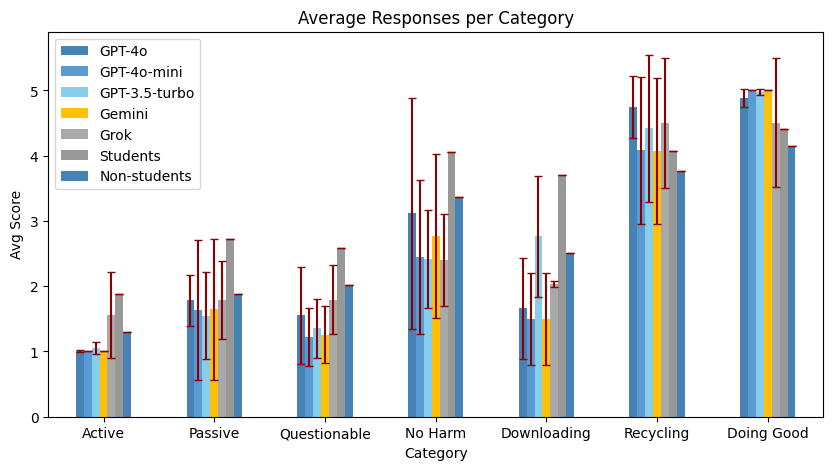

In [6]:
# create plot with error bars 
fig, ax = plt.subplots()
category_averages.plot(
    kind="bar",
    ylim=(0, 5.9),
    yerr=category_errors,
    capsize=3,
    ecolor="darkred",
    color=["#4682b4", "#5a9bd4", "#87ceeb", "#FFC107", "#A9A9A9", "#989898"],
    ax=ax,
    title="Average Responses per Category",
    xlabel="Category",
    ylabel="Avg Score",
    figsize=(10, 5),
    rot=0,
)

fig.savefig("category_averages.png")

<Axes: title={'center': 'Average Responses per Category'}, xlabel='Categories', ylabel='Average Score'>

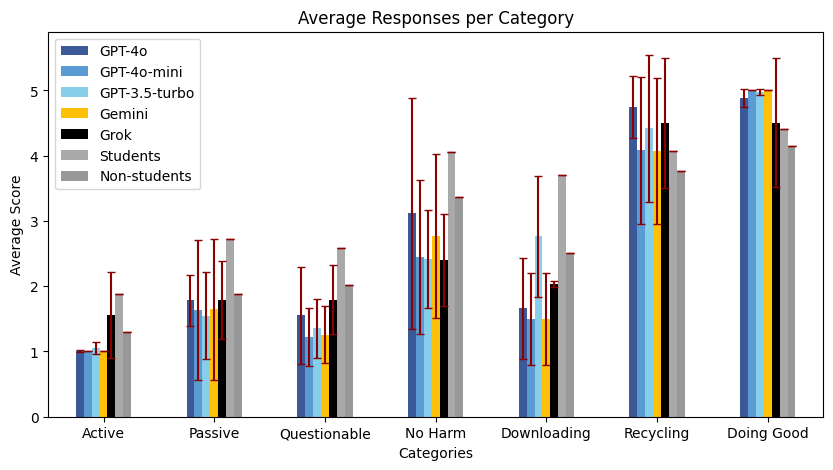

In [7]:

fig, ax = plt.subplots()
category_averages.plot(
    kind="bar",
    ylim=(0, 5.9),
    yerr=category_errors,
    capsize=3,
    ecolor="darkred",
    color=["#3B5998", "#5a9bd4", "#87ceeb", "#FFC107", "#000000", "#A9A9A9", "#989898"],
    ax=ax,
    title="Average Responses per Category",
    xlabel="Categories",
    ylabel="Average Score",
    figsize=(10, 5),
    rot=0,
)

In [8]:
category_errors

,GPT-4o,GPT-4o-mini,GPT-3.5-turbo,Gemini,Grok,Students,Non-students
Active,0.013416,0.000000,0.091924,0.000000,0.659492,0,0
Passive,0.387746,1.071709,0.668144,1.084136,0.593613,0,0
Questionable,0.749913,0.437516,0.450910,0.433590,0.525005,0,0
No Harm,1.768649,1.179627,0.744862,1.257649,0.706682,0,0
Downloading,0.777817,0.707107,0.926310,0.707107,0.042426,0,0
Recycling,0.475070,1.128923,1.126913,1.119241,1.000000,0,0
Doing Good,0.139374,0.000000,0.050000,0.000000,0.985000,0,0


In [19]:
gpt4o_avg.iloc[slices[1]]

,Averages,std
#,,
6,1.11,0.314466
7,2.24,0.429235
8,1.94,0.277798
9,1.65,0.479372
10,2.00,0.246183
11,1.76,0.452155


In [17]:
gpt4o_avg.iloc[slices[0], 0].mean()

1.006

In [18]:
gpt4o_avg.iloc[slices[1], 0].std()

0.013416407864998748

### testing

In [ ]:
category_averages = pd.DataFrame(index=labels, columns=["GPT-4o", "GPT-100"])
category_averages["GPT-4o"] = [gpt4o_avg.iloc[s, 0].mean() for s in slices]
category_averages["GPT-100"] = [gpt4omini_avg.iloc[s, 0].mean() for s in slices]

stacked = pd.DataFrame()
stacked["avg"] = category_averages.stack(future_stack=True)

category_averages["GPT-4o"] = [gpt4o_avg.iloc[s, 1].mean() for s in slices]
category_averages["GPT-100"] = [gpt4omini_avg.iloc[s, 1].mean() for s in slices]

stacked["std"] = category_averages.stack(future_stack=True)

stacked.head()

In [ ]:
print(stacked["avg"].unstack())

In [ ]:
active = pd.DataFrame()
active = gpt4o_avg.iloc[slices[0], 0]
print(active)

In [ ]:
# get category averages
active.mean()

In [ ]:
active_raw = pd.DataFrame()
active_raw = gpt4o_raw[gpt4o_raw.index.isin(range(slices[0].start, slices[0].stop + 1))]
print(active_raw)

In [ ]:
active_raw["Answers"].mean()

In [ ]:
gpt4o_raw.head()

In [ ]:
sl = slices[0]
number = 5
print(sl)
print(number in range(sl.start, sl.stop + 1))
print(sl.start)
print(sl.stop)